In [1]:
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
import matplotlib.pyplot as plt

## Lecture du catalgue Tycho-2

In [23]:
t1 = Table.read('./data/tyc2.h5')
t2 = Table.read('./data/suppl_1.h5')
#t3 = Table.read('./data/suppl_2.h5')
t = vstack([t1, t2])

t = t[:][t['VTmag'] <= 11]

In [16]:
c = SkyCoord(t['RA_ICRS_']*u.deg, t['DE_ICRS_']*u.deg, frame='icrs', equinox='J2000.0')

In [17]:
t.show_in_notebook()

idx,TYC1,TYC2,TYC3,pmRA,pmRA.mask,pmDE,pmDE.mask,BTmag,BTmag.mask,VTmag,VTmag.mask,HIP,HIP.mask,RA_ICRS_,DE_ICRS_
0,50,1721,1,nan,True,nan,True,3.644,False,3.551,False,12706,False,40.82550083,3.23616611
1,58,1618,1,-11.7,False,-77.7,False,4.687,False,2.716,False,14135,False,45.56991167,4.08992139
2,79,1585,1,4.5,False,-2.3,False,3.939,False,3.888,False,18907,False,60.78907361,5.98930972
3,89,2558,1,nan,True,nan,True,3.465,False,3.657,False,22797,False,73.56289806,2.44067139
4,92,2345,1,-3.1,False,0.7,False,3.458,False,3.638,False,22549,False,72.80152361,5.60510167
5,96,1462,1,462.9,False,11.8,False,3.723,False,3.222,False,22449,False,72.45896806,6.96124889
6,224,1333,1,-199.4,False,-53.2,False,4.25,False,3.488,False,43109,False,131.69432472,6.41890917
7,225,1116,1,-76.4,False,-8.1,False,4.387,False,3.21,False,43813,False,133.84867333,5.94552917
8,227,2544,1,127.2,False,-309.3,False,3.803,False,3.853,False,45336,False,138.59082444,2.31498472
9,273,924,1,740.3,False,-271.7,False,4.256,False,3.649,False,57757,False,177.67212306,1.76535778


## Displaying celestial sphere

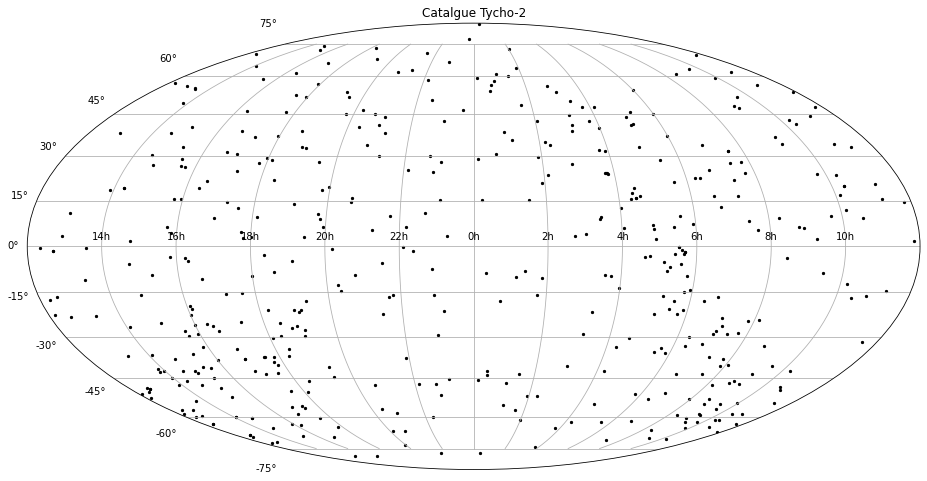

In [18]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(c.ra.wrap_at(180*u.degree).radian, c.dec.radian,
           color='k', s=5)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.set_title('Catalgue Tycho-2') 
ax.grid(True)

In [7]:
fig.savefig("map.jpg")

## Hist Mag

In [8]:
#Johnson conversion for absolut magnitude
t['V'] = t['VTmag'] - 0.09 * (t['BTmag'] - t['VTmag']) 

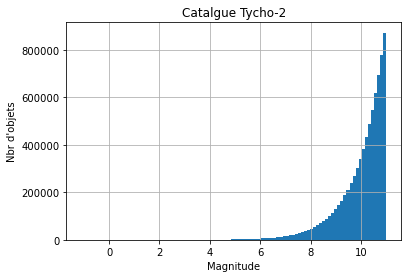

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(t['VTmag'][t['VTmag'] < 11], cumulative=True, bins=100)
ax.set_title('Catalog Tycho-2')
ax.set_xlabel('Magnitude')
ax.set_ylabel("Nbr d'objects")
ax.grid(True)